In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

train = pd.read_csv("../input/mnist-in-csv/mnist_train.csv")
print(train.shape)
train.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
test = pd.read_csv("../input/mnist-in-csv/mnist_test.csv")
print(test.shape)
test.head()

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
y_train = train["label"]
x_train = train.drop(labels = ["label"], axis = 1)

In [87]:
y_test = test["label"]
x_test = test.drop(labels = ["label"], axis = 1)
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
from keras.utils.np_utils import to_categorical 
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

x_train shape:  (60000, 784)
x_test shape:  (10000, 784)
x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)
print("x_train shape", X_train.shape)
print("x_test shape", X_val.shape)
print("y_train shape", Y_train.shape)
print("y_test shape", Y_val.shape)

x_train shape (54000, 28, 28, 1)
x_test shape (6000, 28, 28, 1)
y_train shape (54000, 10)
y_test shape (6000, 10)


In [101]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [100]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [99]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [98]:
epochs = 10
batch_size = 250

In [97]:
datagen = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False,  
        samplewise_std_normalization = False, 
        zca_whitening = False,
        rotation_range = 5,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        horizontal_flip = False,
        vertical_flip = False
)

datagen.fit(X_train)

In [94]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size), epochs = epochs, validation_data = (X_val, Y_val), steps_per_epoch = X_train.shape[0] // batch_size)

Epoch 1/10
216/216 [==============================] - 26s 117ms/step - loss: 1.3961 - accuracy: 0.5200 - val_loss: 0.1642 - val_accuracy: 0.9532
Epoch 2/10
216/216 [==============================] - 25s 117ms/step - loss: 0.3837 - accuracy: 0.8783 - val_loss: 0.1097 - val_accuracy: 0.9675
Epoch 3/10
216/216 [==============================] - 25s 117ms/step - loss: 0.2761 - accuracy: 0.9115 - val_loss: 0.0794 - val_accuracy: 0.9765
Epoch 4/10
216/216 [==============================] - 25s 117ms/step - loss: 0.2263 - accuracy: 0.9313 - val_loss: 0.0678 - val_accuracy: 0.9798
Epoch 5/10
216/216 [==============================] - 25s 117ms/step - loss: 0.2010 - accuracy: 0.9381 - val_loss: 0.0611 - val_accuracy: 0.9807
Epoch 6/10
216/216 [==============================] - 25s 117ms/step - loss: 0.1847 - accuracy: 0.9427 - val_loss: 0.0589 - val_accuracy: 0.9823
Epoch 7/10
216/216 [==============================] - 25s 117ms/step - loss: 0.1649 - accuracy: 0.9480 - val_loss: 0.0524 - val_ac

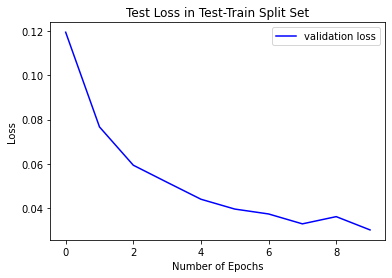

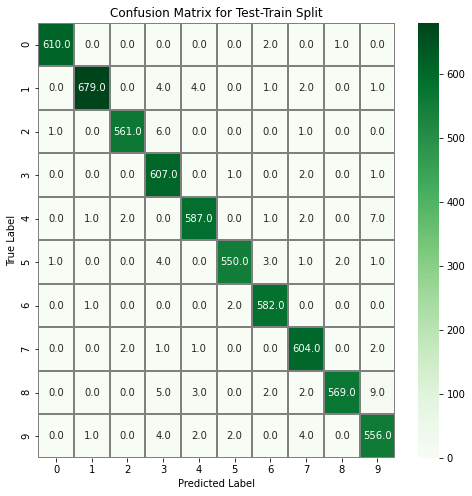

In [96]:

plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss in Test-Train Split Set")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Test-Train Split")
plt.show()

Epoch 1/10
240/240 [==============================] - 30s 123ms/step - loss: 1.3491 - acc: 0.5431 - val_loss: 0.1194 - val_acc: 0.9656
Epoch 2/10
240/240 [==============================] - 29s 122ms/step - loss: 0.3471 - acc: 0.8907 - val_loss: 0.0767 - val_acc: 0.9761
Epoch 3/10
240/240 [==============================] - 29s 122ms/step - loss: 0.2542 - acc: 0.9207 - val_loss: 0.0594 - val_acc: 0.9817
Epoch 4/10
240/240 [==============================] - 30s 124ms/step - loss: 0.2115 - acc: 0.9358 - val_loss: 0.0517 - val_acc: 0.9842
Epoch 5/10
240/240 [==============================] - 30s 123ms/step - loss: 0.1847 - acc: 0.9423 - val_loss: 0.0440 - val_acc: 0.9855
Epoch 6/10
240/240 [==============================] - 29s 122ms/step - loss: 0.1666 - acc: 0.9492 - val_loss: 0.0396 - val_acc: 0.9874
Epoch 7/10
240/240 [==============================] - 29s 122ms/step - loss: 0.1560 - acc: 0.9532 - val_loss: 0.0374 - val_acc: 0.9868
Epoch 8/10
240/240 [==============================] - 3

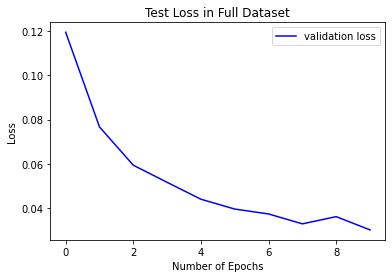

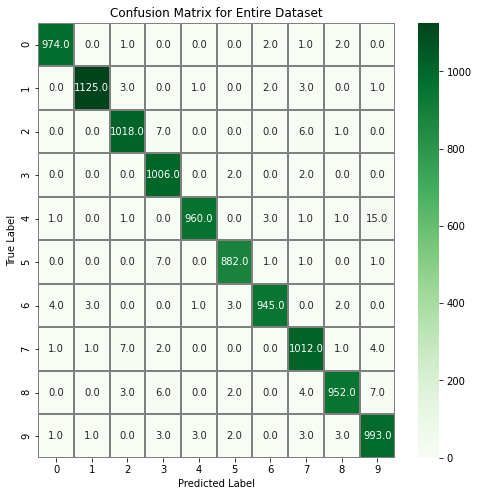

In [95]:

full_model = Sequential()
full_model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
full_model.add(MaxPool2D(pool_size=(2,2)))
full_model.add(Dropout(0.25))
full_model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
full_model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
full_model.add(Dropout(0.25))
full_model.add(Flatten())
full_model.add(Dense(256, activation = "relu"))
full_model.add(Dropout(0.5))
full_model.add(Dense(10, activation = "softmax"))

opt = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

full_model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["acc"])

datagen.fit(x_train)

history = full_model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, validation_data = (x_test, y_test), steps_per_epoch = x_train.shape[0] // batch_size)


plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss in Full Dataset")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Entire Dataset")
plt.show()